**Type of Loss function in Classification task**
* **For Binary Classification--Log Loss Loss Function also called as Binary Cross Entropy Loss Function.**
* **For Multiclass Classification-- Multiclass log loss also called as Categorical Cross Entropy. OHE is necessory**
* **For Multiclass classification-- Sparse Categorical Cross Entropy. Integer Based Encoding is necessory.**

### Binary Cross Classification

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import make_classification

import tensorflow
import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import InputLayer, Dense

**Creating Classification Dataset**

In [2]:
X,y = make_classification(n_samples=3000, n_features=20, n_classes=2 )

In [3]:
X.shape

(3000, 20)

In [4]:
y.shape

(3000,)

In [6]:
y
#For sparse

array([0, 1, 1, ..., 1, 1, 0])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train.shape

(2400, 20)

In [8]:
X_test.shape

(600, 20)

**Binary Cross Entropy**

In [14]:
model = Sequential()

model.add(InputLayer(input_shape=(20,)))
model.add(Dense(units=4, activation='sigmoid', use_bias=True))
model.add(Dense(units=6, activation='sigmoid', use_bias=True))
model.add(Dense(units=1, activation='sigmoid', use_bias=True))

In [15]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 4)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
sgd = SGD(learning_rate=0.001)

In [18]:
from keras.metrics import F1Score, Precision, Accuracy

In [25]:
model.compile(optimizer=sgd, loss ='binary_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2)

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6571 - loss: 0.6773 - val_accuracy: 0.6438 - val_loss: 0.6790
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6819 - loss: 0.6744 - val_accuracy: 0.6458 - val_loss: 0.6786
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6518 - loss: 0.6770 - val_accuracy: 0.6458 - val_loss: 0.6783
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6688 - loss: 0.6754 - val_accuracy: 0.6521 - val_loss: 0.6779
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6739 - loss: 0.6751 - val_accuracy: 0.6562 - val_loss: 0.6776
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6898 - loss: 0.6733 - val_accuracy: 0.6562 - val_loss: 0.6772
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6857 - loss: 0.6730 - val_accuracy: 0.6562 - val_loss: 0.6768
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6749 - loss: 0.6739 - val_accuracy: 0.

In [27]:
history.history

{'accuracy': [0.6645833253860474,
  0.6661458611488342,
  0.6630208492279053,
  0.6666666865348816,
  0.675000011920929,
  0.6697916388511658,
  0.6755208373069763,
  0.6770833134651184,
  0.6796875,
  0.6807291507720947],
 'loss': [0.6767284870147705,
  0.6763737201690674,
  0.6760299801826477,
  0.6756690740585327,
  0.6753095984458923,
  0.6749398112297058,
  0.6745688915252686,
  0.6741994619369507,
  0.6738078594207764,
  0.6734253168106079],
 'val_accuracy': [0.643750011920929,
  0.6458333134651184,
  0.6458333134651184,
  0.6520833373069763,
  0.65625,
  0.65625,
  0.65625,
  0.65625,
  0.6583333611488342,
  0.6583333611488342],
 'val_loss': [0.678955614566803,
  0.6786082983016968,
  0.6782671213150024,
  0.6779035925865173,
  0.677560567855835,
  0.6771848201751709,
  0.6768271923065186,
  0.6764583587646484,
  0.6760966181755066,
  0.6757187247276306]}

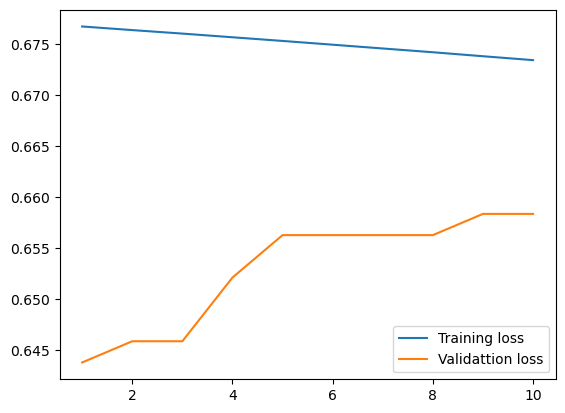

In [29]:
plt.plot(range(1,11), history.history['loss'], label = 'Training loss')
plt.plot(range(1,11), history.history['val_accuracy'], label = 'Validattion loss')
plt.legend()

**Prediction**

In [30]:
model.predict(X_test)

#It giving probablity, for eg there us 0.46 propbablity that there is 1 class


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[0.4672876 ],
       [0.46574306],
       [0.4726326 ],
       [0.49743918],
       [0.5130811 ],
       [0.5397128 ],
       [0.48088416],
       [0.48146844],
       [0.49101526],
       [0.52638155],
       [0.48902532],
       [0.5342828 ],
       [0.4845991 ],
       [0.4840456 ],
       [0.4985901 ],
       [0.53384423],
       [0.5378103 ],
       [0.525396  ],
       [0.46578804],
       [0.48769617],
       [0.459102  ],
       [0.5452011 ],
       [0.46880275],
       [0.54615235],
       [0.4819449 ],
       [0.4952479 ],
       [0.53815067],
       [0.52594924],
       [0.4959753 ],
       [0.5102338 ],
       [0.48657534],
       [0.4832652 ],
       [0.50309956],
       [0.49568146],
       [0.50406355],
       [0.48469338],
       [0.48164716],
       [0.4517898 ],
       [0.46433702],
       [0.5458818 ],
       [0.51414096],
       [0.52602684],
       [0.49479327],
       [0.475079  ],
       [0.4884198 ],
       [0.5380374 ],
       [0.51168597],
       [0.498

In [33]:
np.where(model.predict(X_test) >= 0.5,1,0)

#0.5, probab value will be given bt domain expert
#Or we can take probablity greater than 0.5, assign as 1 otherwise 0

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
    

In [34]:
np.where(model.predict(X_test) >= 0.5,1,0).flatten()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,

In [40]:
pred = np.where(model.predict(X_test) >= 0.5,1,0).flatten()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [41]:
from keras.metrics import F1Score

In [43]:
from keras import metrics

metrics.Accuracy(y_test, pred)

In [50]:
metrics.Accuracy(y_test, pred)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [42]:
F1Score(y_test, pred)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Categorical Cross Entropy Classification

In [62]:
X,y = make_classification(n_samples=3000, n_features=20, n_classes=2 )

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train.shape

(2400, 20)

In [69]:
model1 = Sequential()

model1.add(InputLayer(shape=(20,)))
model1.add(Dense(units=4, activation='sigmoid', use_bias=True))
model1.add(Dense(units=6, activation='sigmoid', use_bias=True))
model1.add(Dense(units=2, activation='softmax', use_bias=True))

#Output Layer will contain neoron == no of class(k)
#There will be two probabality of success and failure

In [70]:
model1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 4)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 6)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 2)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128 (512.00 B)

 Trainable params: 128 (512.00 B)

 Non-trainable params: 0 (0.00 B)

In [71]:
sgd = SGD(learning_rate=0.001)

In [74]:
model1.compile(optimizer=sgd, loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [76]:
model1.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(10,), output.shape=(10, 2)

* **To handle this error there would be two reason**
* **1. Check and use correct loss**
* **2. Check how many neuron in OL**

* **Solution is :- Use sparse_categorical_crossentropy**

In [77]:
model1.compile(optimizer=sgd, loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [79]:
model1.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2)

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5086 - loss: 0.6912 - val_accuracy: 0.4625 - val_loss: 0.6991
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5155 - loss: 0.6857 - val_accuracy: 0.4625 - val_loss: 0.6939
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5246 - loss: 0.6817 - val_accuracy: 0.4729 - val_loss: 0.6903
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5278 - loss: 0.6811 - val_accuracy: 0.5000 - val_loss: 0.6878
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5347 - loss: 0.6826 - val_accuracy: 0.5354 - val_loss: 0.6860
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5721 - loss: 0.6814 - val_accuracy: 0.5500 - val_loss: 0.6847
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5823 - loss: 0.6801 - val_accuracy: 0.5604 - val_loss: 0.6835
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5969 - loss: 0.6786 - val_accuracy: 0.

In [80]:
history = model1.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2)

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6077 - loss: 0.6775 - val_accuracy: 0.5958 - val_loss: 0.6803
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6333 - loss: 0.6758 - val_accuracy: 0.6021 - val_loss: 0.6796
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6320 - loss: 0.6753 - val_accuracy: 0.6042 - val_loss: 0.6789
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6402 - loss: 0.6757 - val_accuracy: 0.6104 - val_loss: 0.6782
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6368 - loss: 0.6765 - val_accuracy: 0.6146 - val_loss: 0.6777
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6306 - loss: 0.6742 - val_accuracy: 0.6208 - val_loss: 0.6772
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6530 - loss: 0.6737 - val_accuracy: 0.6208 - val_loss: 0.6765
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6563 - loss: 0.6732 - val_accuracy: 0.

**Internally we use sparse categ cross entr because for categ cross ent OHE in necesssory**

### Categorical Cross Entropy:- Encoded as OHE and use Categ Cross Ent

In [81]:
from sklearn.preprocessing import OneHotEncoder

In [82]:
ohe = OneHotEncoder(sparse_output=False)
y_trainohe = ohe.fit_transform(y_train.reshape((2400,1)))

#To convert 1d array to 2d array, becz OHE reqired 2d array

In [84]:
y_trainohe.shape

(2400, 2)

In [83]:
y_trainohe

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [86]:
model2 = Sequential()

model2.add(InputLayer(shape=(20,)))
model2.add(Dense(units=4, activation='sigmoid', use_bias=True))
model2.add(Dense(units=6, activation='sigmoid', use_bias=True))
model2.add(Dense(units=2, activation='softmax', use_bias=True))

#Output Layer will contain neoron == no of class(k)
#There will be two probabality of success and failure

In [90]:
model2.compile(optimizer='sgd', loss ='categorical_crossentropy', metrics=['accuracy'])

In [91]:
model2.fit(X_train, y_trainohe, batch_size=10, epochs=10, validation_split=0.2)

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5008 - loss: 0.7735 - val_accuracy: 0.6417 - val_loss: 0.6806
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6212 - loss: 0.6814 - val_accuracy: 0.5875 - val_loss: 0.6796
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6710 - loss: 0.6766 - val_accuracy: 0.7083 - val_loss: 0.6709
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7216 - loss: 0.6683 - val_accuracy: 0.7583 - val_loss: 0.6618
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7388 - loss: 0.6607 - val_accuracy: 0.7604 - val_loss: 0.6526
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7535 - loss: 0.6514 - val_accuracy: 0.7729 - val_loss: 0.6414
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7630 - loss: 0.6368 - val_accuracy: 0.7833 - val_loss: 0.6259
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7901 - loss: 0.6259 - val_accuracy: 0.

In [96]:
np.argmax(model2.predict(X_test),axis=1).shape

#to convert 2d to 1d

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


(600,)

In [97]:
pred = np.argmax(model2.predict(X_test),axis=1).shape

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [98]:
metrics.F1Score(y_test, pred)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()